In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
 
world_cups = pd.read_csv("WorldCups.csv")
world_cups = world_cups[['Year', 'Attendance']]
print(world_cups)

    Year Attendance
0   1930    590.549
1   1934    363.000
2   1938    375.700
3   1950  1.045.246
4   1954    768.607
5   1958    819.810
6   1962    893.172
7   1966  1.563.135
8   1970  1.603.975
9   1974  1.865.753
10  1978  1.545.791
11  1982  2.109.723
12  1986  2.394.031
13  1990  2.516.215
14  1994  3.587.538
15  1998  2.785.100
16  2002  2.705.197
17  2006  3.359.439
18  2010  3.178.856
19  2014  3.386.810


    Year Attendance
0   1930    590.549
1   1934    363.000
2   1938    375.700
3   1950  1.045.246
4   1954    768.607
5   1958    819.810
6   1962    893.172
7   1966  1.563.135
8   1970  1.603.975
9   1974  1.865.753
10  1978  1.545.791
11  1982  2.109.723
12  1986  2.394.031
13  1990  2.516.215
14  1994  3.587.538
15  1998  2.785.100
16  2002  2.705.197
17  2006  3.359.439
18  2010  3.178.856
19  2014  3.386.810


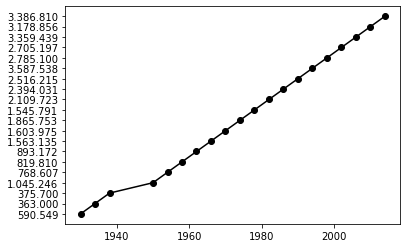

In [4]:
world_cups = pd.read_csv("WorldCups.csv")
world_cups = world_cups[['Year', 'Attendance']]
print(world_cups)

plt.plot(world_cups['Year'], world_cups['Attendance'], marker='o', color='black')
plt.savefig("image.svg", format="svg")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
 
world_cups = pd.read_csv("WorldCups.csv")
world_cups = world_cups[["Year", "GoalsScored", "MatchesPlayed"]]
world_cups["GoalsPerMatch"] = world_cups["GoalsScored"] / world_cups["MatchesPlayed"]
print(world_cups)

    Year  GoalsScored  MatchesPlayed  GoalsPerMatch
0   1930           70             18       3.888889
1   1934           70             17       4.117647
2   1938           84             18       4.666667
3   1950           88             22       4.000000
4   1954          140             26       5.384615
5   1958          126             35       3.600000
6   1962           89             32       2.781250
7   1966           89             32       2.781250
8   1970           95             32       2.968750
9   1974           97             38       2.552632
10  1978          102             38       2.684211
11  1982          146             52       2.807692
12  1986          132             52       2.538462
13  1990          115             52       2.211538
14  1994          141             52       2.711538
15  1998          171             64       2.671875
16  2002          161             64       2.515625
17  2006          147             64       2.296875
18  2010    

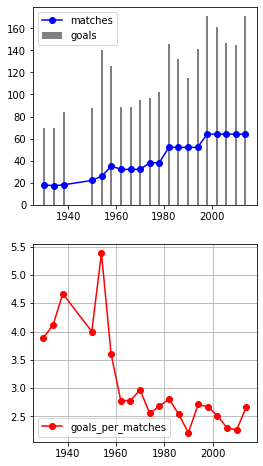

In [9]:
# 첫 번째 그래프 출력
fig, axes = plt.subplots(2, 1, figsize=(4,8))
axes[0].bar(x=world_cups['Year'], height=world_cups['GoalsScored'], color='grey', label='goals')
axes[0].plot(world_cups['Year'], world_cups['MatchesPlayed'], marker='o', color='blue', label='matches')
axes[0].legend(loc='upper left')


# 두 번째 그래프 출력
axes[1].grid(True)
axes[1].plot(world_cups['Year'], world_cups['GoalsPerMatch'], marker='o', color='red', label='goals_per_matches')
axes[1].legend(loc='lower left')
plt.savefig("image.svg", format="svg")

In [10]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
 
world_cups_matches = pd.read_csv("WorldCupMatches.csv")

world_cups_matches = world_cups_matches.replace('Germany FR', 'Germany')
world_cups_matches = world_cups_matches.replace('C�te d\'Ivoire', 'Côte d\'Ivoire')
world_cups_matches = world_cups_matches.replace('rn">Republic of Ireland',"Republic of Ireland")
world_cups_matches = world_cups_matches.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
world_cups_matches = world_cups_matches.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
world_cups_matches = world_cups_matches.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
world_cups_matches = world_cups_matches.replace('rn">United Arab Emirates',"United Arab Emirates")
world_cups_matches = world_cups_matches.replace("Soviet Union","Russia")

dupli = world_cups_matches.duplicated()
print(len(dupli[dupli==True]))

world_cups_matches = world_cups_matches.drop_duplicates()

3735


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# 홈 경기 기록과 원정 경기 기록 저장
home = world_cups_matches[['Home Team Name', 'Home Team Goals']]
away = world_cups_matches[['Away Team Name', 'Away Team Goals']]


# 홈 경기와 원정 경기 통합
goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))

goal_per_country = goal_per_country.append(away.rename(columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))


# 국가별 골 기록 집계
goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)
goal_per_country = goal_per_country.astype(int)
print(goal_per_country)

countries
Germany                   224
Brazil                    221
Argentina                 131
Italy                     128
France                    106
Spain                      92
Hungary                    87
Netherlands                86
Uruguay                    80
England                    79
Sweden                     74
Russia                     66
Yugoslavia                 60
Mexico                     57
Belgium                    52
Switzerland                45
Czechoslovakia             44
Poland                     44
Austria                    43
Portugal                   43
Chile                      40
USA                        37
Korea Republic             31
Paraguay                   30
Romania                    30
Denmark                    27
Colombia                   26
Scotland                   25
Bulgaria                   22
Croatia                    21
Nigeria                    20
Turkey                     20
Peru                       19


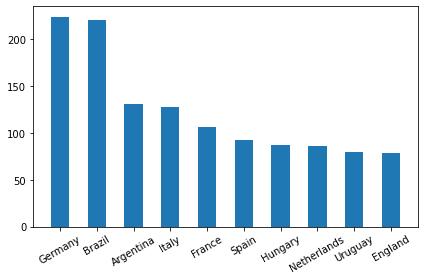

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

goal_per_country = goal_per_country[:10]

# x, y값 저장
x = goal_per_country.index
y = goal_per_country.values

#그래프 그리기
fig, ax = plt.subplots()

ax.bar(x, y, width = 0.5)

# x축 항목 이름 지정, 30도 회전
plt.xticks(x, rotation=30)
plt.tight_layout()

#그래프 출력
plt.savefig("image.svg", format="svg")


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# 2014년 정보 추출
world_cups_matches = world_cups_matches[world_cups_matches['Year'] == 2014]

# 홈 팀 데이터와 원정 팀 데이터 저장
home_team_goal = world_cups_matches.groupby(['Home Team Name'])['Home Team Goals'].sum()
away_team_goal = world_cups_matches.groupby(['Away Team Name'])['Away Team Goals'].sum()

# 홈 팀 데이터와 원정 팀 데이터 병합
team_goal_2014 = pd.concat([home_team_goal, away_team_goal], axis=1).fillna(0)
team_goal_2014['goals'] = team_goal_2014['Home Team Goals'] + team_goal_2014['Away Team Goals']
team_goal_2014 = team_goal_2014.drop(['Home Team Goals', 'Away Team Goals'], axis=1)

# 골 데이터 정렬
team_goal_2014 = team_goal_2014['goals'].sort_values(ascending=False)

# 골 데이터 int로 변환
team_goal_2014 = team_goal_2014.astype('int')

print(team_goal_2014)


Germany                   18
Netherlands               15
Colombia                  12
Brazil                    11
France                    10
Argentina                  8
Algeria                    7
Switzerland                7
Belgium                    6
Chile                      6
Croatia                    6
USA                        5
Costa Rica                 5
Mexico                     5
Spain                      4
Portugal                   4
Ghana                      4
Côte d'Ivoire              4
Bosnia and Herzegovina     4
Uruguay                    4
Greece                     3
Korea Republic             3
Ecuador                    3
Nigeria                    3
Australia                  3
Italy                      2
Japan                      2
England                    2
Russia                     2
Honduras                   1
IR Iran                    1
Cameroon                   1
Name: goals, dtype: int32


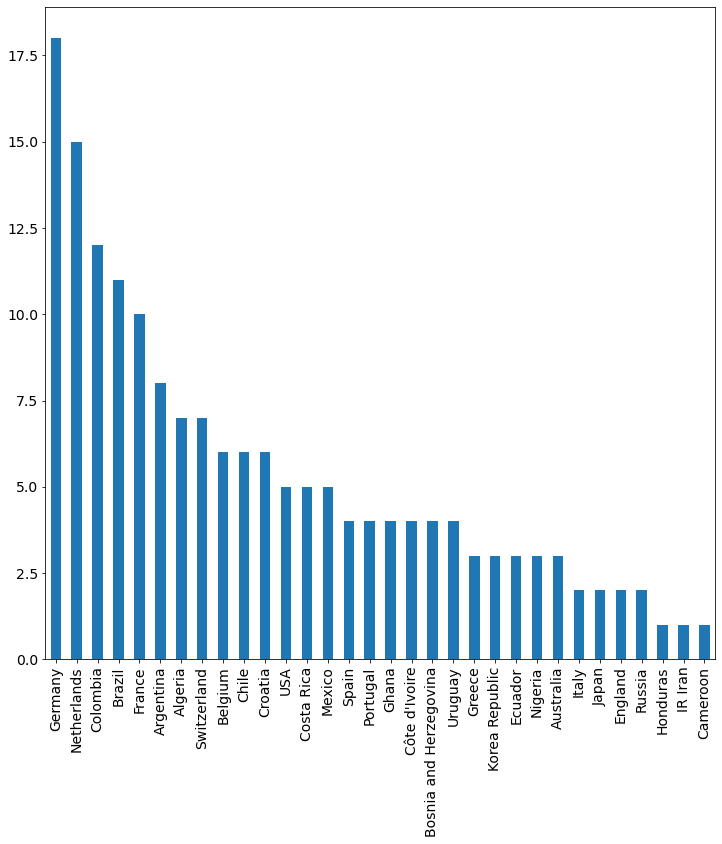

In [23]:
team_goal_2014.plot(x=team_goal_2014.index, y=team_goal_2014.values, kind="bar", figsize=(12, 12), fontsize=14)

plt.savefig("image.svg", format="svg")

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


world_cups = pd.read_csv("WorldCups.csv")

winner = world_cups["Winner"]
runners_up = world_cups["Runners-Up"]
third = world_cups["Third"]
fourth = world_cups["Fourth"]

winner_count = pd.Series(winner.value_counts())
runners_up_count = pd.Series(runners_up.value_counts())
third_count = pd.Series(third.value_counts())
fourth_count = pd.Series(fourth.value_counts())

ranks = pd.DataFrame({"Winner" : winner_count,
                      "Runners_Up" : runners_up_count,
                      "Third" : third_count,
                      "Fourth" : fourth_count})

ranks = ranks.fillna(0).astype('int64')
ranks = ranks.sort_values(['Winner', 'Runners_Up', 'Third', 'Fourth'], ascending=False)

print(ranks)

                Winner  Runners_Up  Third  Fourth
Brazil               5           2      2       2
Italy                4           2      1       1
Germany FR           3           3      1       1
Argentina            2           3      0       0
Uruguay              2           0      0       3
Germany              1           1      3       0
France               1           1      2       1
England              1           0      0       1
Spain                1           0      0       1
Netherlands          0           3      1       1
Czechoslovakia       0           2      0       0
Hungary              0           2      0       0
Sweden               0           1      2       1
Poland               0           0      2       0
Austria              0           0      1       1
Portugal             0           0      1       1
Chile                0           0      1       0
Croatia              0           0      1       0
Turkey               0           0      1       0


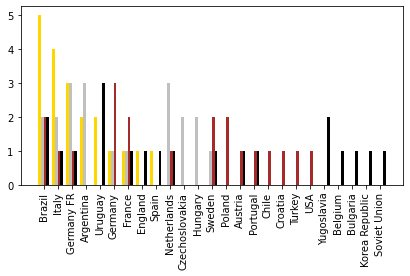

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# x축에 그려질 막대그래프들의 위치입니다.
x = np.array(list(range(0, len(ranks))))

# 그래프를 그립니다.
fig, ax = plt.subplots()

# x 위치에, 항목 이름으로 ranks.index(국가명)을 붙입니다.
plt.xticks(x, ranks.index, rotation=90)
plt.tight_layout()

# 4개의 막대를 차례대로 그립니다.
ax.bar(x - 0.3, ranks['Winner'],     color = 'gold',   width = 0.2, label = 'Winner')
ax.bar(x - 0.1, ranks['Runners_Up'], color = 'silver', width = 0.2, label = 'Runners_Up')
ax.bar(x + 0.1, ranks['Third'],      color = 'brown',  width = 0.2, label = 'Third')
ax.bar(x + 0.3, ranks['Fourth'],     color = 'black',  width = 0.2, label = 'Fourth')

plt.savefig("image.svg", format="svg")